In [1]:
#Importing Libraries

import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 200)

In [2]:
#Importing data from csv file to dataframe

train_users = pd.read_csv("input/train_users_2.csv")
test_users = pd.read_csv("input/test_users.csv")



In [3]:
#Checking size of the train and test data

print(train_users.shape)
print(test_users.shape)


(213451, 16)
(62096, 15)


In [4]:
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
#Checking the columns which have null values

train_users.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [6]:
#Type of the attributes of train data

train_users.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [7]:
#Concatenating the train and test users data

users = pd.concat((train_users, test_users), axis=0, ignore_index=True, sort = False)

In [9]:
users.sample(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
191026,eli35ksb3t,2014-05-18,20140518052458,2014-06-25,FEMALE,19.0,basic,24,en,direct,direct,linked,Moweb,iPhone,Mobile Safari,US
13130,euhd2tksag,2011-11-27,20111127195146,NaN,MALE,36.0,facebook,0,zh,direct,direct,linked,Web,iPhone,Mobile Safari,NDF
224820,8zj0u9806g,2014-07-19,20140719100058,NaN,MALE,34.0,facebook,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NaN
44606,0tnuagqj3t,2012-10-12,20121012233315,NaN,FEMALE,NaN,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,NDF
227962,1jo84wshxc,2014-07-23,20140723012342,NaN,-unknown-,NaN,basic,23,en,direct,direct,untracked,Android,Android Phone,-unknown-,NaN


In [10]:
#Columns in user data which have null values

users.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         186639
gender                          0
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser                   0
country_destination         62096
dtype: int64

#Country_destination is null only in test user data because we have to predict the data

In [11]:
pd.crosstab(users['date_first_booking'].isnull(), users['country_destination'])

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
date_first_booking,,,,,,,,,,,,
False,539,1428,1061,2249,5023,2324,2835,0,762,217,62376,10094
True,0,0,0,0,0,0,0,124543,0,0,0,0


In [12]:
test_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
id                         62096 non-null object
date_account_created       62096 non-null object
timestamp_first_active     62096 non-null int64
date_first_booking         0 non-null float64
gender                     62096 non-null object
age                        33220 non-null float64
signup_method              62096 non-null object
signup_flow                62096 non-null int64
language                   62096 non-null object
affiliate_channel          62096 non-null object
affiliate_provider         62096 non-null object
first_affiliate_tracked    62076 non-null object
signup_app                 62096 non-null object
first_device_type          62096 non-null object
first_browser              62096 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 7.1+ MB


In [13]:
test_users.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

In [14]:
test_users.describe()


,timestamp_first_active,date_first_booking,age,signup_flow
count,6.209600e+04,0.0,33220.000000,62096.000000
mean,2.014081e+13,NaN,37.616677,7.813885
std,8.024585e+07,NaN,74.440647,11.254291
min,2.014070e+13,NaN,1.000000,0.000000
25%,2.014072e+13,NaN,26.000000,0.000000
50%,2.014081e+13,NaN,31.000000,0.000000
75%,2.014091e+13,NaN,40.000000,23.000000
max,2.014093e+13,NaN,2002.000000,25.000000


In [15]:
#fixing up date format for the date_account_created and timestamp_first_active as their datatype were string and int

users['date_account_created'] = pd.to_datetime(users['date_account_created'], format  = '%Y-%m-%d')
#users['date_first_booking'] = pd.to_datetime(users['date_first_booking'], format  = '%Y-%m-%d')
#users['date_first_active'] = pd.to_datetime((users['timestamp_first_active'] // 1000000), format='%Y-%m-%d')
users['timestamp_first_active'] = pd.to_datetime(users['timestamp_first_active'], format='%Y%m%d%H%M%S')

In [16]:
#Too many data entries are missing for date_first_booking column in both train and test users data.
users.drop('date_first_booking', axis=1, inplace=True)

In [17]:
users.sample(5)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
252204,eyqqv9tibf,2014-08-25,2014-08-25 19:35:22,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Mac Desktop,Firefox,NaN
194158,eajo6mtre8,2014-05-23,2014-05-23 23:33:12,-unknown-,46.0,basic,0,en,direct,direct,omg,Web,Windows Desktop,Chrome,other
104835,frsjdremqz,2013-09-04,2013-09-04 06:18:18,FEMALE,29.0,facebook,0,en,sem-non-brand,google,untracked,Web,Android Tablet,IE,US
125314,3a5kcz74bc,2013-11-17,2013-11-17 19:52:26,-unknown-,NaN,basic,24,en,direct,direct,untracked,Moweb,Windows Desktop,Chrome,NDF
247292,duo2y81shc,2014-08-18,2014-08-18 07:13:05,FEMALE,44.0,basic,0,zh,direct,direct,linked,Web,Mac Desktop,Safari,NaN


In [18]:
users.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
gender                             object
age                               float64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

In [19]:
users.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
gender                          0
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser                   0
country_destination         62096
dtype: int64

In [20]:
users['gender'].value_counts()

-unknown-    129480
FEMALE        77524
MALE          68209
OTHER           334
Name: gender, dtype: int64

In [ ]:
#Converting unknown gender values to null values

def convert_unknown_to_nan(str_unknown):
    if str_unknown == '-unknown-':
        return np.nan
    return str_unknown


users['gender'] = users['gender'].apply(convert_unknown_to_nan)

In [21]:
users['gender'].value_counts()

-unknown-    129480
FEMALE        77524
MALE          68209
OTHER           334
Name: gender, dtype: int64

In [22]:
#Detecting Outliers

users['age'].value_counts()

30.0      7712
28.0      7687
29.0      7647
31.0      7540
27.0      7462
32.0      7187
33.0      6795
26.0      6745
34.0      6176
25.0      6149
35.0      5949
36.0      5032
24.0      4571
37.0      4474
38.0      4091
39.0      3642
23.0      3516
40.0      3327
41.0      3098
42.0      2731
45.0      2669
44.0      2584
22.0      2508
43.0      2486
46.0      2317
19.0      2023
47.0      2006
48.0      1779
50.0      1679
51.0      1630
          ... 
1949.0       3
1936.0       2
1920.0       2
111.0        2
1938.0       2
1929.0       2
1923.0       2
1926.0       2
1944.0       2
1951.0       2
1940.0       2
1942.0       1
2002.0       1
150.0        1
1952.0       1
1945.0       1
2008.0       1
1939.0       1
2000.0       1
1995.0       1
1948.0       1
1968.0       1
1930.0       1
1941.0       1
1922.0       1
1954.0       1
1953.0       1
132.0        1
1937.0       1
112.0        1
Name: age, Length: 145, dtype: int64

(1000, 2020)

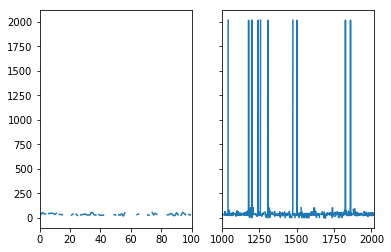

In [23]:
#plt.figure(figsize = (12,8))
fig , (ax1, ax2) =plt.subplots(1,2, sharey = True)
ax1.plot(users['age'])
ax2.plot(users['age'])
ax1.set_xlim(0,100)
ax2.set_xlim(1000,2020)


In [24]:
users[users['age'] > 95]['age'].value_counts()

105.0     1351
2014.0     710
110.0      228
104.0       52
101.0       40
102.0       39
2013.0      39
109.0       36
100.0       31
103.0       30
107.0       28
96.0        27
106.0       20
99.0        19
98.0        17
108.0       16
115.0       13
97.0        13
1928.0       6
1927.0       6
2001.0       5
113.0        4
1931.0       4
1933.0       3
1934.0       3
1949.0       3
1932.0       3
1925.0       3
1947.0       3
1924.0       3
1935.0       3
1929.0       2
1940.0       2
1920.0       2
1936.0       2
1944.0       2
1938.0       2
111.0        2
1926.0       2
1923.0       2
1951.0       2
1922.0       1
1945.0       1
1941.0       1
2002.0       1
1954.0       1
1968.0       1
112.0        1
1995.0       1
150.0        1
1942.0       1
1953.0       1
1930.0       1
1937.0       1
1948.0       1
2008.0       1
132.0        1
1939.0       1
2000.0       1
1952.0       1
Name: age, dtype: int64

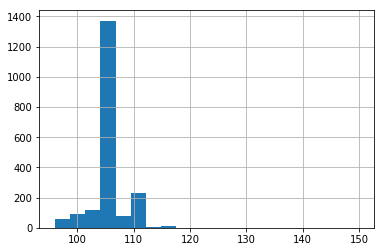

In [25]:
users[(users.age > 95) & (users.age < 1000)].age.hist(bins = 20)

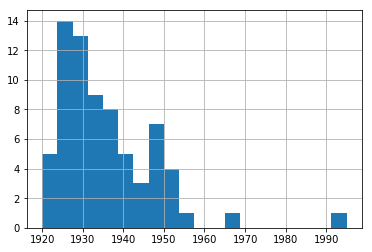

In [26]:
users[(users.age > 1000) & (users.age < 2000)].age.hist(bins = 20)


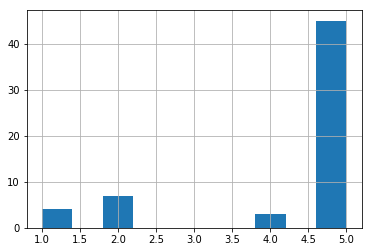

In [27]:
users[users.age <  14].age.hist()

#Users who have claimed their age as more than 95 seem to be deceptive information as according to the search the oldest traveller is 95 years old. Children less than below 14 are generally accompanied by any guardian and moreover according to airbnb policy the age must be above 14 to do the bookings.

In [28]:
users.loc[users.age > 95, 'age'] = np.nan
users.loc[users.age < 14, 'age'] = np.nan

In [29]:
users[users['age'] >  95]['age']

Series([], Name: age, dtype: float64)

In [30]:
users.groupby('country_destination')['age'].mean().round()

country_destination
AU       37.0
CA       37.0
DE       37.0
ES       35.0
FR       37.0
GB       38.0
IT       37.0
NDF      37.0
NL       36.0
PT       36.0
US       36.0
other    36.0
Name: age, dtype: float64

In [31]:
#destinations = train_users['country_destination'].unique()

#for i in destinations:
#    users.loc[(users['age'].isnull()) & (users['country_destination'] == i),'age'] = users.groupby('country_destination')['age'].mean().round(2)[i]

In [32]:
users.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
gender                          0
age                        119722
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser                   0
country_destination         62096
dtype: int64

In [33]:
users['age'].fillna(37, inplace = True)

In [34]:
users['first_affiliate_tracked'].value_counts()

untracked        143181
linked            62064
omg               54859
tracked-other      6655
product            2353
marketing           281
local ops            69
Name: first_affiliate_tracked, dtype: int64

In [35]:
users['first_affiliate_tracked'].fillna('other', inplace=True)

In [36]:
#Converting few features into categorical columns

categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method'
]

for categorical_feature in categorical_features:
    users[categorical_feature] = users[categorical_feature].astype('category')

In [37]:
#Converting into dummy variables
dummy_features = []

for feature in categorical_features:
    dummy_features = pd.get_dummies(users[feature])
    users.drop(feature,axis=1,inplace=True)
    users = pd.concat([users,dummy_features],axis=1)

In [38]:
users.sample(5)

,id,date_account_created,timestamp_first_active,age,signup_flow,country_destination,api,content,direct,other,remarketing,sem-brand,sem-non-brand,seo,baidu,bing,craigslist,daum,direct,email-marketing,facebook,facebook-open-graph,google,gsp,meetup,naver,other,padmapper,vast,wayn,yahoo,yandex,linked,local ops,marketing,omg,other,product,tracked-other,untracked,-unknown-,AOL Explorer,Android Browser,Apple Mail,Arora,Avant Browser,BlackBerry Browser,Camino,Chrome,Chrome Mobile,Chromium,CometBird,Comodo Dragon,Conkeror,CoolNovo,Crazy Browser,Epic,Firefox,Flock,Google Earth,Googlebot,IBrowse,IE,IE Mobile,IceDragon,IceWeasel,Iron,Kindle Browser,Maxthon,Mobile Firefox,Mobile Safari,Mozilla,NetNewsWire,Nintendo Browser,OmniWeb,Opera,Opera Mini,Opera Mobile,Outlook 2007,PS Vita browser,Pale Moon,Palm Pre web browser,RockMelt,Safari,SeaMonkey,Silk,SiteKiosk,SlimBrowser,Sogou Explorer,Stainless,TenFourFox,TheWorld Browser,UC Browser,Yandex.Browser,wOSBrowser,Android Phone,Android Tablet,Desktop (Other),Mac Desktop,Other/Unknown,SmartPhone (Other),Windows Desktop,iPad,iPhone,-unknown-,FEMALE,MALE,OTHER,-unknown-,ca,cs,da,de,el,en,es,fi,fr,hr,hu,id,is,it,ja,ko,nl,no,pl,pt,ru,sv,th,tr,zh,Android,Moweb,Web,iOS,basic,facebook,google,weibo
37207,7gf8j7ydjr,2012-08-20,2012-08-20 00:36:05,29.0,0,US,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
271771,c0rsqcmeky,2014-09-24,2014-09-24 18:45:18,37.0,0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
99642,0q0twifp2u,2013-08-15,2013-08-15 19:49:08,67.0,25,US,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
98542,6j1fyj82rc,2013-08-12,2013-08-12 00:54:12,37.0,0,NDF,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
184372,28mbjib6kl,2014-05-04,2014-05-04 17:40:15,37.0,0,NDF,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


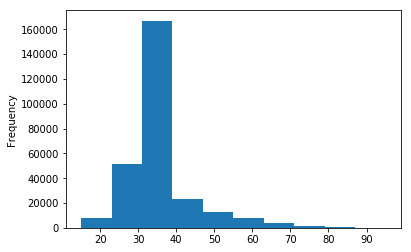

In [39]:
users['age'].plot.hist()

In [40]:
users['AgeBins'] = pd.cut(users['age'], 10)

In [41]:
users['AgeBins'].value_counts()

(31.0, 39.0]     163068
(23.0, 31.0]      55513
(39.0, 47.0]      21218
(47.0, 55.0]      11986
(14.92, 23.0]     11491
(55.0, 63.0]       7296
(63.0, 71.0]       3595
(71.0, 79.0]        936
(79.0, 87.0]        261
(87.0, 95.0]        183
Name: AgeBins, dtype: int64

In [42]:
users.loc[ users['age'] <= 23, 'AgeBand'] = 0
users.loc[(users['age'] > 23) & (users['age'] <= 31), 'AgeBand'] = 1
users.loc[(users['age'] > 31) & (users['age'] <= 39), 'AgeBand'] = 2
users.loc[(users['age'] > 39) & (users['age'] <= 47), 'AgeBand'] = 3
users.loc[(users['age'] > 47) & (users['age'] <= 55), 'AgeBand'] = 4
users.loc[(users['age'] > 55) & (users['age'] <= 63), 'AgeBand'] = 5
users.loc[(users['age'] > 63) & (users['age'] <= 71), 'AgeBand'] = 6
users.loc[(users['age'] > 71) & (users['age'] <= 79), 'AgeBand'] = 7
users.loc[(users['age'] > 79) & (users['age'] <= 87), 'AgeBand'] = 8
users.loc[ users['age'] > 87, 'AgeBand'] = 9

In [43]:
users['AgeBand'].value_counts()

2.0    163068
1.0     55513
3.0     21218
4.0     11986
0.0     11491
5.0      7296
6.0      3595
7.0       936
8.0       261
9.0       183
Name: AgeBand, dtype: int64

In [44]:
users.drop('AgeBins', inplace = True, axis = 1)

In [45]:
users.sample(5)

,id,date_account_created,timestamp_first_active,age,signup_flow,country_destination,api,content,direct,other,remarketing,sem-brand,sem-non-brand,seo,baidu,bing,craigslist,daum,direct,email-marketing,facebook,facebook-open-graph,google,gsp,meetup,naver,other,padmapper,vast,wayn,yahoo,yandex,linked,local ops,marketing,omg,other,product,tracked-other,untracked,-unknown-,AOL Explorer,Android Browser,Apple Mail,Arora,Avant Browser,BlackBerry Browser,Camino,Chrome,Chrome Mobile,Chromium,CometBird,Comodo Dragon,Conkeror,CoolNovo,Crazy Browser,Epic,Firefox,Flock,Google Earth,Googlebot,IBrowse,IE,IE Mobile,IceDragon,IceWeasel,Iron,Kindle Browser,Maxthon,Mobile Firefox,Mobile Safari,Mozilla,NetNewsWire,Nintendo Browser,OmniWeb,Opera,Opera Mini,Opera Mobile,Outlook 2007,PS Vita browser,Pale Moon,Palm Pre web browser,RockMelt,Safari,SeaMonkey,Silk,SiteKiosk,SlimBrowser,Sogou Explorer,Stainless,TenFourFox,TheWorld Browser,UC Browser,Yandex.Browser,wOSBrowser,Android Phone,Android Tablet,Desktop (Other),Mac Desktop,Other/Unknown,SmartPhone (Other),Windows Desktop,iPad,iPhone,-unknown-,FEMALE,MALE,OTHER,-unknown-,ca,cs,da,de,el,en,es,fi,fr,hr,hu,id,is,it,ja,ko,nl,no,pl,pt,ru,sv,th,tr,zh,Android,Moweb,Web,iOS,basic,facebook,google,weibo,AgeBand
107349,2rx57m5yd8,2013-09-13,2013-09-13 18:40:05,37.0,0,NDF,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2.0
169543,0pxqpcj79i,2014-03-30,2014-03-30 17:45:11,25.0,12,NDF,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1.0
98337,irm0w2q00r,2013-08-11,2013-08-11 01:56:19,37.0,0,NDF,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2.0
245320,2t07xnshay,2014-08-15,2014-08-15 05:00:35,62.0,0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,5.0
72718,ftvze4aq3i,2013-04-24,2013-04-24 00:42:33,37.0,0,NDF,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2.0


In [46]:
users['month_account_created'] = users['date_account_created'].dt.month

In [55]:
pd.crosstab(users['country_destination'], users['month_account_created'])

month_account_created,1,2,3,4,5,6,7,8,9,10,11,12
country_destination,,,,,,,,,,,,
AU,54,44,41,34,64,47,23,41,43,41,63,44
CA,73,79,122,157,219,221,107,127,101,74,92,56
DE,79,70,96,122,132,130,90,92,99,53,49,49
ES,152,182,232,284,306,348,174,162,153,90,77,89
FR,384,410,510,587,715,610,314,383,342,292,248,228
GB,157,191,239,278,304,310,156,148,158,144,132,107
IT,223,209,341,349,416,361,188,200,189,139,114,106
NDF,10476,9558,11655,12601,14957,16377,7802,8229,9143,7751,7841,8153
NL,47,67,67,75,121,114,41,73,50,39,39,29
